In [2]:
import pandas as pd
import numpy as np

In [3]:
from fastbook import * 
from pathlib import Path 

In [32]:
# searches = ('beer', 'white rum','dark rum', 'tequila', 'whiskey', 'vodka', 'simple syrup', 'lime juice', 'grenadine', 'pineapple juice', 'cranberry juice')
# path = Path('alcohol_images')
# 
# if not path.exists():
#     path.mkdir(parents=True, exist_ok=True)
#     for o in searches: 
#         dest = path / o
#         dest.mkdir(parents=True, exist_ok=True)
#         results = search_images_ddg(f'{o} photo')
#         download_images(dest, urls=results[:200])
#         resize_images(dest, max_size=400, dest=dest)

/Users/nathanglen/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/nathanglen/anaconda3/lib/python3.

In [33]:
# failed = verify_images(get_image_files(path))
# failed.map(Path.unlink)

(#73) [None,None,None,None,None,None,None,None,None,None...]

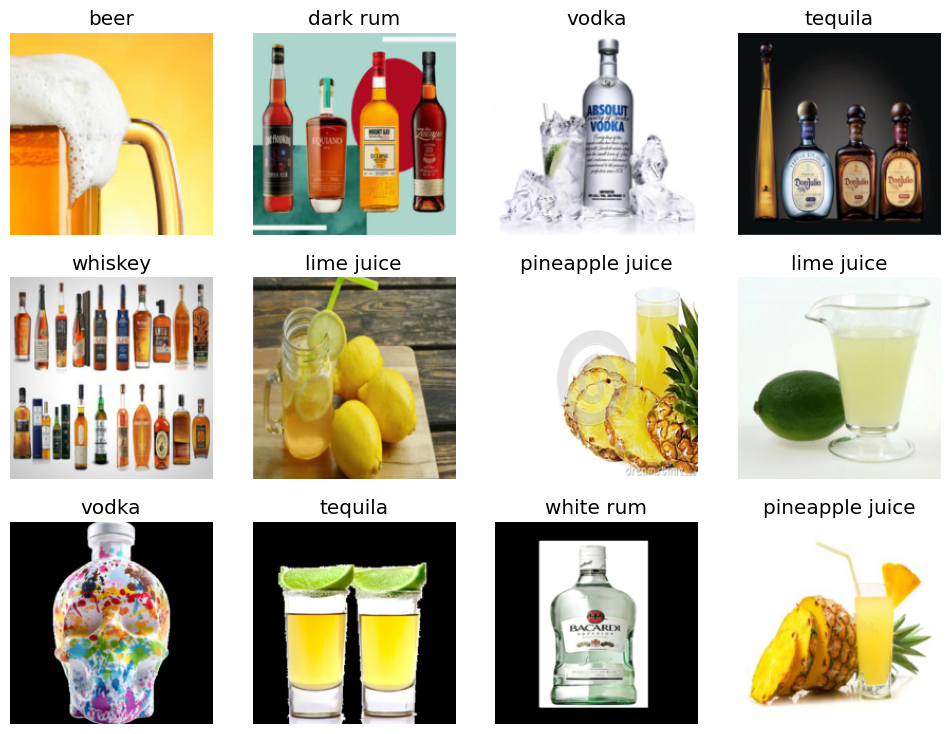

In [34]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, 
    item_tfms= [Resize(192,method='squish')],
).dataloaders(path)

dls.show_batch(max_n=12) # easy to just look at data

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate) # vision_learner is the new name  
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.757877,1.315275,0.406948,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.314703,1.109588,0.362283,00:10
1,0.928944,1.000997,0.292804,00:11
2,0.607347,0.990634,0.270471,00:11
3,0.415215,0.970737,0.263027,00:11


In [36]:
alcohol_type, _, probs = learn.predict(PILImage.create('data/Beer.jpg'))
print(f"This is a: {alcohol_type}.")
print(f"Probability it's a beer: {probs[0]:.4f}")

This is a: simple syrup.
Probability it's a beer: 0.0531


In [29]:
learn.save('alcohol_classifier')

Path('models/alcohol_classifier.pth')